---
title: ""
author: "Yurkov Sergey"
date: "2024-01-01"
categories: [python]
format: html
draft: true
---


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 2.x
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
import requests

url = "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"
query_parameters = {"downloadformat": "csv"}

response = requests.get(url, params=query_parameters)

with open("insurance.csv", mode="wb") as file:
    file.write(response.content)


In [3]:
dataset = pd.read_csv("insurance.csv")
dataset.tail()


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
dataset.isna().sum()

# region_list = dataset["region"].unique()
# region_map = {i: e for e, i in enumerate(region_list)}
# region_map


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
# dataset["sex"] = dataset["sex"].map({"male": 1, "female": 2})
# dataset["smoker"] = dataset["smoker"].map({"yes": 1, "no": 0})
# dataset["region"] = dataset["sex"].map(region_map)

dataset = pd.get_dummies(dataset, columns=["sex"], prefix="sex", prefix_sep="_")
dataset = pd.get_dummies(dataset, columns=["smoker"], prefix="smoker", prefix_sep="_")
dataset = pd.get_dummies(dataset, columns=["region"], prefix="region", prefix_sep="_")

dataset.tail()


,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True
1337,61,29.1,0,29141.36,True,False,False,True,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("expenses")
test_labels = test_features.pop("expenses")


In [10]:
model = keras.Sequential(
    [
        layers.Dense(units=16, activation="relu"),
        layers.Dense(units=8, activation="relu"),
        layers.Dense(units=1, activation="linear"),
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error",
    metrics=["mae"],
)


In [12]:
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    verbose=1,
    validation_split=0.2,
)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 12400.3613 - mae: 12400.3613 - val_loss: 8794.2754 - val_mae: 8794.2754
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7730.8154 - mae: 7730.8154 - val_loss: 8197.8213 - val_mae: 8197.8213
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6926.5454 - mae: 6926.5454 - val_loss: 7878.8511 - val_mae: 7878.8511
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6531.6499 - mae: 6531.6499 - val_loss: 7495.9204 - val_mae: 7495.9204
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5858.8516 - mae: 5858.8516 - val_loss: 7229.2598 - val_mae: 7229.2598
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6184.5981 - mae: 6184.5981 - val_loss: 7193.7910 - val_mae: 7193.7910
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6406.2319 - mae: 6406.2319 - val_loss: 6683.9468 - val_mae: 6683.9468
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4873.6665 - mae: 4873.6665 - val_loss: 6323

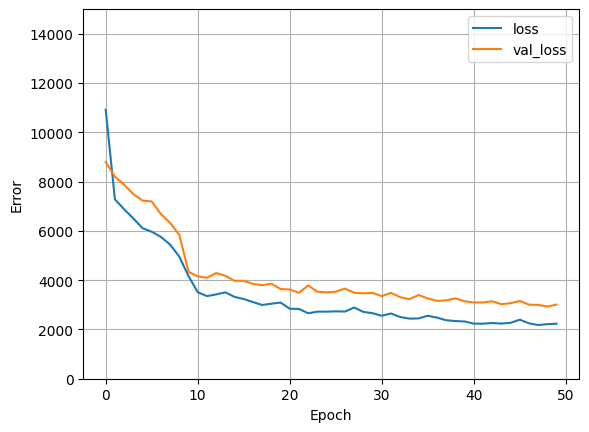

In [13]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([0, 15_000])
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)


plot_loss(history)

# Renaming for the test
test_dataset = test_features


9/9 - 0s - 6ms/step - loss: 2247.7083 - mae: 2247.7083
Testing set Mean Abs Error: 2247.71 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


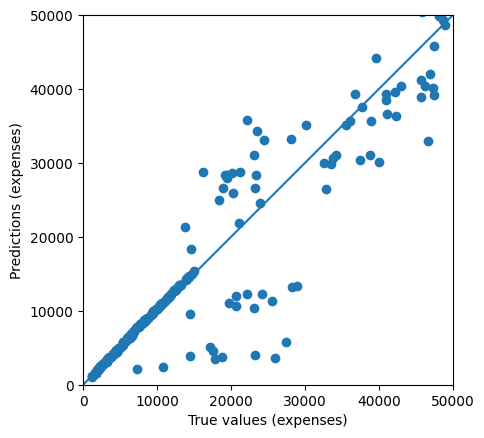

In [17]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
# loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)
# mae = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect="equal")
plt.scatter(test_labels, test_predictions)
plt.xlabel("True values (expenses)")
plt.ylabel("Predictions (expenses)")
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba20e4ea-3940-4228-b5c5-d97f3b338f97' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>
